<a href="https://colab.research.google.com/github/Jii111/FOR-ESAA/blob/master/Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv",sep=",",)
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 3. Assign it to a variable apple

In [ ]:
apple = data

### Step 4.  Check out the type of the columns

In [ ]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
Date         8465 non-null object
Open         8465 non-null float64
High         8465 non-null float64
Low          8465 non-null float64
Close        8465 non-null float64
Volume       8465 non-null int64
Adj Close    8465 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.0+ KB


### Step 5. Transform the Date column as a datetime type

In [ ]:
apple["Date"] = pd.to_datetime(apple['Date'])
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 6.  Set the date as the index

In [ ]:
apple_set_date = apple.set_index('Date')
apple_set_date.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [ ]:
apple.duplicated().sum() # 중복 없음

0

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [ ]:
apple_s = apple_set_date.sort_values('Date')
apple_s.head(10)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-19,28.25,28.38,28.25,28.25,12157600,0.44
1980-12-22,29.63,29.75,29.63,29.63,9340800,0.46
1980-12-23,30.88,31.00,30.88,30.88,11737600,0.48
1980-12-24,32.50,32.63,32.50,32.50,12000800,0.51


### Step 9. Get the last business day of each month

In [ ]:
print(pd.date_range('1980-12-12','2014-07-08', freq='BM'))

DatetimeIndex(['1980-12-31', '1981-01-30', '1981-02-27', '1981-03-31',
               '1981-04-30', '1981-05-29', '1981-06-30', '1981-07-31',
               '1981-08-31', '1981-09-30',
               ...
               '2013-09-30', '2013-10-31', '2013-11-29', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-30', '2014-06-30'],
              dtype='datetime64[ns]', length=403, freq='BM')


### Step 10.  What is the difference in days between the first day and the oldest

In [ ]:
datetime(2014, 7, 8) - datetime(1980, 12, 12)

datetime.timedelta(days=12261)

### Step 11.  How many months in the data we have?

In [ ]:
end_date = pd.to_datetime('2014-07-08')
apple['Date'] = pd.to_datetime(apple['Date'])
apple['month'] = ((end_date - apple['Date'])/np.timedelta64(1, 'M')).astype(int)
apple.tail()

,Date,Open,High,Low,Close,Volume,Adj Close,month
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,402
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,402
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,402
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42,402
8464,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45,402


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

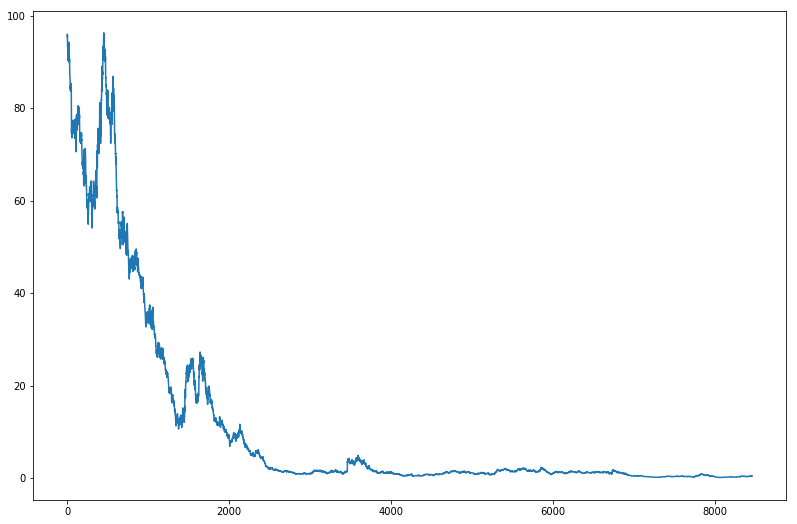

In [ ]:
plt.figure(figsize=(13.5,9))
plt.plot('Adj Close',data=apple)
plt.show()

### BONUS: Create your own question and answer it.